<h1><center>K-Means Clustering</center></h1>

<h2 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h2>

- Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
- Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics.
-  It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. 
- For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. 
- A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.

### Loading the package

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing 
from sklearn import model_selection 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Load Data From CSV File  

In [3]:
cust_df = pd.read_csv("./data/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
cust_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


<h2 id="pre_processing">Pre-processing</h2

### 1. Remove categorical features:
- As you can see, __Address__ in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [5]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### 2. Handling the missing values

In [6]:
df.Defaulted = df.Defaulted.fillna(method="ffill")

### 3. Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.

In [7]:
useful_col = [
            # 'Customer Id', 
            'Age', 
            'Edu',
            'Years Employed',
            'Income',
            'Card Debt',
            'Other Debt',
            'Defaulted',
            'DebtIncomeRatio'
]

In [8]:
X = df[useful_col]

std_scalar = preprocessing.StandardScaler()
X_scaled = std_scalar.fit_transform(X)
X_scaled

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.5891249 , -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.5891249 ,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.69743293,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.69743293,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.5891249 , -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.5891249 , -0.2340332 ]])

In [9]:
print(f"Shape of Final Training Data: {X_scaled.shape}")

Shape of Final Training Data: (850, 8)


<h2 id="modeling">Modeling</h2>

- In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. 
- However, using the K-means clustering we can do all this process much easier.

**Lets apply k-means on our dataset, and take look at cluster labels.**

In [10]:
from sklearn.cluster import KMeans

clusterNum = 3
k_means = KMeans(init="k-means++", 
                 n_clusters=clusterNum, 
                 n_init = 12, 
                 max_iter=500)
k_means.fit(X_scaled)

KMeans(max_iter=500, n_clusters=3, n_init=12)

### K-Means Performance metric (Inertia):
- it is the mean squared distance of each instance from its closet centriod
- K-Means randomly calculate it for `n_init` times.
- `If we know best centriods by any means we can pass to it as an array.`
- whichever is lowest, is considered as final clusters centriods.  

In [11]:
k_means.inertia_, k_means.score(X_scaled)

(4381.253569863999, -4381.253569863999)

### Note:
- ``**score() method**`` returns the negative inertia. 
- ``Why negative?`` 
**Because a predictor's score() method must always respect Scikit-Learn’s "greater is better" rule: if a predictor is better than another then its score() method should return a greater score.**

----

### Relation b/w y_preds and labels_ on training data

In [12]:
y_preds = k_means.predict(X_scaled)
y_preds[:10]

array([2, 0, 1, 2, 0, 0, 2, 2, 2, 0])

In [13]:
labels = k_means.labels_ # for each data-point KMeans assign a label (0 to n_clusters-1)
print(f"Length of labels: {len(labels)} and Top 25 labels is: {labels[:25]}")

Length of labels: 850 and Top 25 labels is: [2 0 1 2 0 0 2 2 2 0 1 1 2 2 1 1 2 2 0 2 2 2 1 0 0]


In [14]:
# The KMeans instance preserves a copy of the labels of the instances on which it was trained,
# available via the labels_ instance
y_preds in  labels, len(y_preds), len(labels), y_preds[:5], labels[:5]

(True, 850, 850, array([2, 0, 1, 2, 0]), array([2, 0, 1, 2, 0]))

### Clusters centriod
- Each centroid has the same dimension as the input train data dim (i.e feature cnts)

In [15]:
k_means.cluster_centers_  # (n_cluters, features-dimension)

array([[ 1.018788  ,  0.27664638,  1.23246534,  1.39815879,  1.21326788,
         1.44582817, -0.09270116,  0.57958096],
       [-0.44180925,  0.04824103, -0.63399351, -0.40997305, -0.0751988 ,
        -0.16785251,  1.67310784,  0.41657465],
       [-0.14077576, -0.10023444, -0.13361559, -0.26557883, -0.33388107,
        -0.36903845, -0.5891249 , -0.32629871]])

### Predicting to new data

In [16]:
X_test = np.array([
    [ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116, -0.59048916,
        -0.5891249, -0.57652509],
    [2.1116364 , -0.76634938,  1.09746566,  0.44975434,  0.13611081,
        0.16463355, -0.5891249 , -0.2340332]
    
    ])

k_means.predict(X_test)

array([2, 0])

### Soft Clustering:
- Here, score is calculated bw each instance and cluster's centroid
- The score can be the distance between the instance and the centroid or a similarity score
- In the KMeans class, `the transform() method` measures the distance from each instance to every centroid:

In [17]:
print(f"datapoints assigned to cluster: {k_means.predict(X_test)}")

print()
# row: 2 datapoints 
# column: distance from each cluster's centroid
k_means.transform(X_test)

datapoints assigned to cluster: [2 0]



array([[4.0598142 , 2.87862345, 1.20426885],
       [2.62868508, 4.07638449, 2.83875736]])

### Note:
- Instance assigned to cluster which has least distance from centriod.
- If you have a high-dimensional dataset and you transform it this way, you end up with a k-dimensional dataset.
- `For example: we had 8-dim X_test data and we reduced it to 3-dim (n_cluster)`
- this transformation can be a very efficient nonlinear dimensionality reduction technique.

----

<h2 id="insights">Insights</h2>

We assign the labels to each row in dataframe.

In [18]:
df["cluster_label"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_label
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


We can easily check the centroid values by averaging the features in each cluster:
- Mean, Median, Min and Max etc

In [19]:
df.iloc[:, 1:].groupby('cluster_label').agg(["mean", "median"])

Age              Edu        Years Employed         \
                    mean median      mean median           mean median   
cluster_label                                                            
0              43.217105   43.0  1.967105    2.0      16.914474   16.0   
1              31.478723   29.0  1.755319    2.0       4.271277    3.0   
2              33.898039   34.0  1.617647    1.0       7.660784    7.0   

                   Income        Card Debt         Other Debt          \
                     mean median      mean  median       mean  median   
cluster_label                                                           
0              100.532895   81.0  4.154520  3.1665   7.989961  7.0715   
1               30.882979   27.0  1.417053  1.0290   2.508612  1.8300   
2               36.445098   32.0  0.867459  0.6070   1.825224  1.4940   

              Defaulted        DebtIncomeRatio         
                   mean median            mean median  
cluster_label                                          
0              0.217105    0.0       14.063816  13.20  
1              0.989362    1.0       12.969149  12.25  
2              0.000000    0.0        7.980392   6.90

Now, lets look at the distribution of customers based on their age and income:

In [20]:
area = np.pi*(X_scaled[:, 1])**2 # Education is used as marker; higher edu; higher marker size

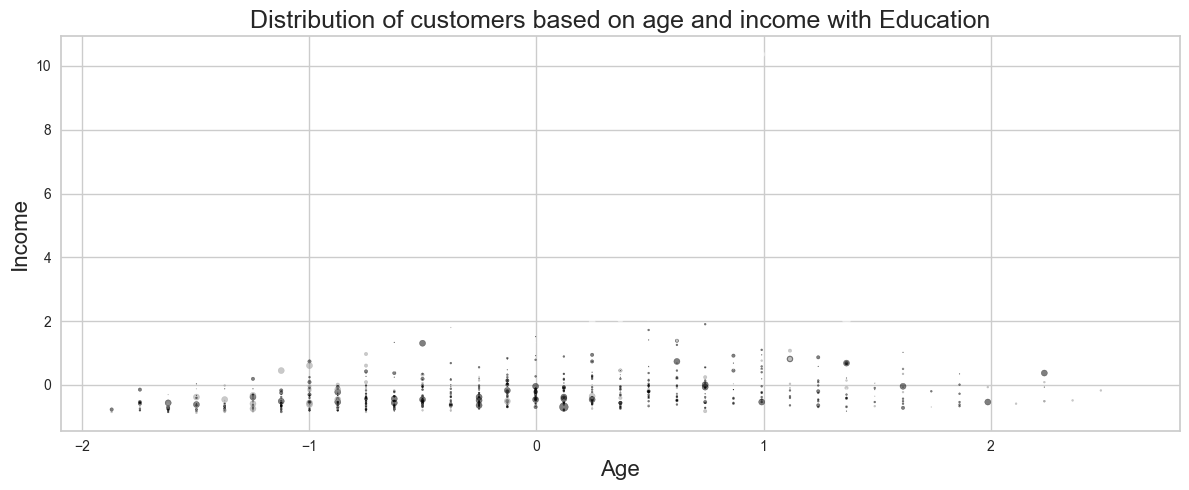

In [21]:
plt.figure(figsize=(12, 5), dpi=100)

# 0th col: Age, 3rd col: Income
# s: The marker size in points**2.
# c: The marker colors
plt.scatter(X_scaled[:, 0], X_scaled[:, 3], s=area, c=labels.astype("int"), alpha=0.5)  
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.title("Distribution of customers based on age and income with Education", fontsize=18)
plt.tight_layout()
plt.show()

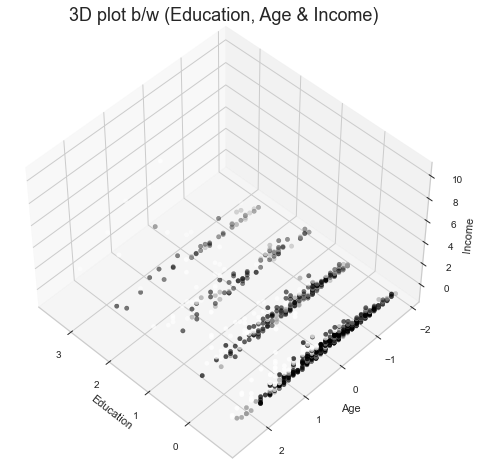

In [22]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.set_title("3D plot b/w (Education, Age & Income)", fontsize=18)

ax.scatter(X_scaled[:, 1], X_scaled[:, 0], X_scaled[:, 3], c=labels.astype("float"))  
plt.show()

### Conclusion:
K-Means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME

---

# Looking into further depth

1. Mini-batch K-Means v/s K-Means (Refer e-book)
2. Select optimal cluster number
3. Limitation of K-Means (Refer e-book)

### 2. Select optimal cluster number

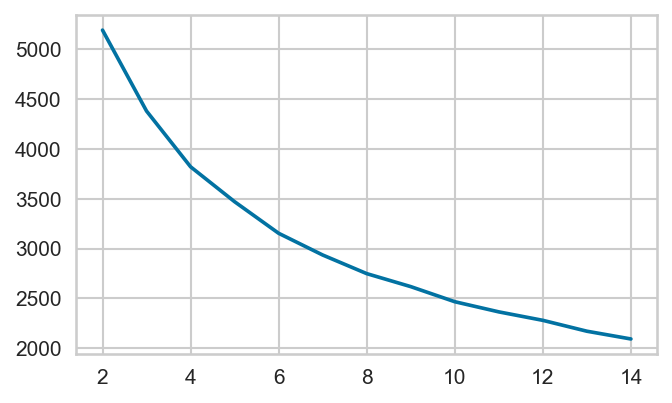

In [23]:
inertias = []
for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster, init="k-means++", n_init=12, max_iter=500, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    # print(f"Performing Clustering for {n_cluster=} done!")

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(range(2, 15), inertias)
plt.show()

In [24]:
# !pip install yellowbrick

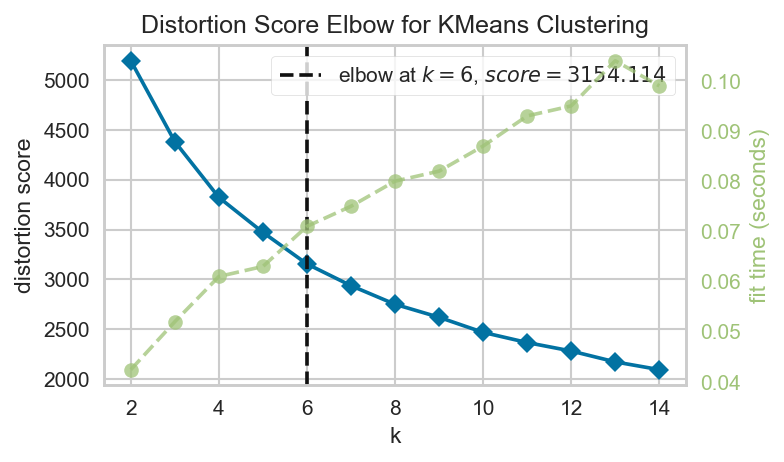

In [42]:
from yellowbrick.cluster import KElbowVisualizer 
plt.figure(figsize=(5, 3), dpi=150)

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=n_cluster, init="k-means++", n_init=12, max_iter=500, random_state=0)
visualizer = KElbowVisualizer(model, k=(2, 15))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure
plt.show()

## Silhouette Score:
Silhouette coefficient is equal to `(b – a) / max(a, b)`, 
WHERE;
> - a is the mean distance to the other instances in the same cluster
> - b is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster)



- Silhouette `(Silo-vaiet)` score lies b/w -1 to 1
- `–1 means` the instance may have been assigned to the wrong cluster.
- `+1 means` the instance may have been assigned to the wrong cluster.
-  `0 means` it is close to a cluster boundary,

In [26]:
metrics.silhouette_score(X_scaled, k_means.labels_)

0.2602180293729482

### Selecting the number of clusters k using the silhouette score

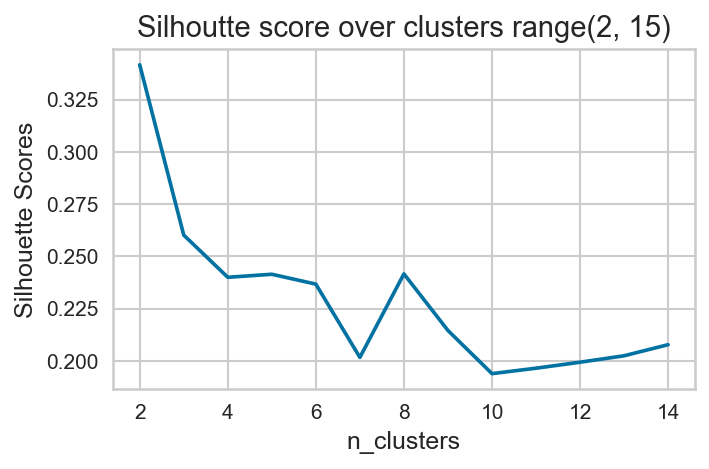

In [41]:
silhouette_scores = []
clusters_range = range(2, 15)
for n_cluster in clusters_range:
    kmeans = KMeans(n_clusters=n_cluster, init="k-means++", n_init=12, max_iter=500, random_state=0)
    kmeans.fit(X_scaled)
    silhouette_scores.append(metrics.silhouette_score(X_scaled, kmeans.labels_))
    # print(f"Performing Clustering for {n_cluster=} done!")

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(clusters_range, silhouette_scores)
plt.title("Silhoutte score over clusters range(2, 15)", fontsize=14)
plt.xlabel("n_clusters",  fontsize=12)
plt.ylabel("Silhouette Scores", fontsize=12)
plt.show()

### Selecting the number of clusters k using the silhouette diagram
1. The shape's height indicates the number of instances the cluster contains
2. width represents the sorted silhouette coefficients of the instances in the cluster (wider is better). 
3. The dashed line indicates the mean silhouette coefficient.

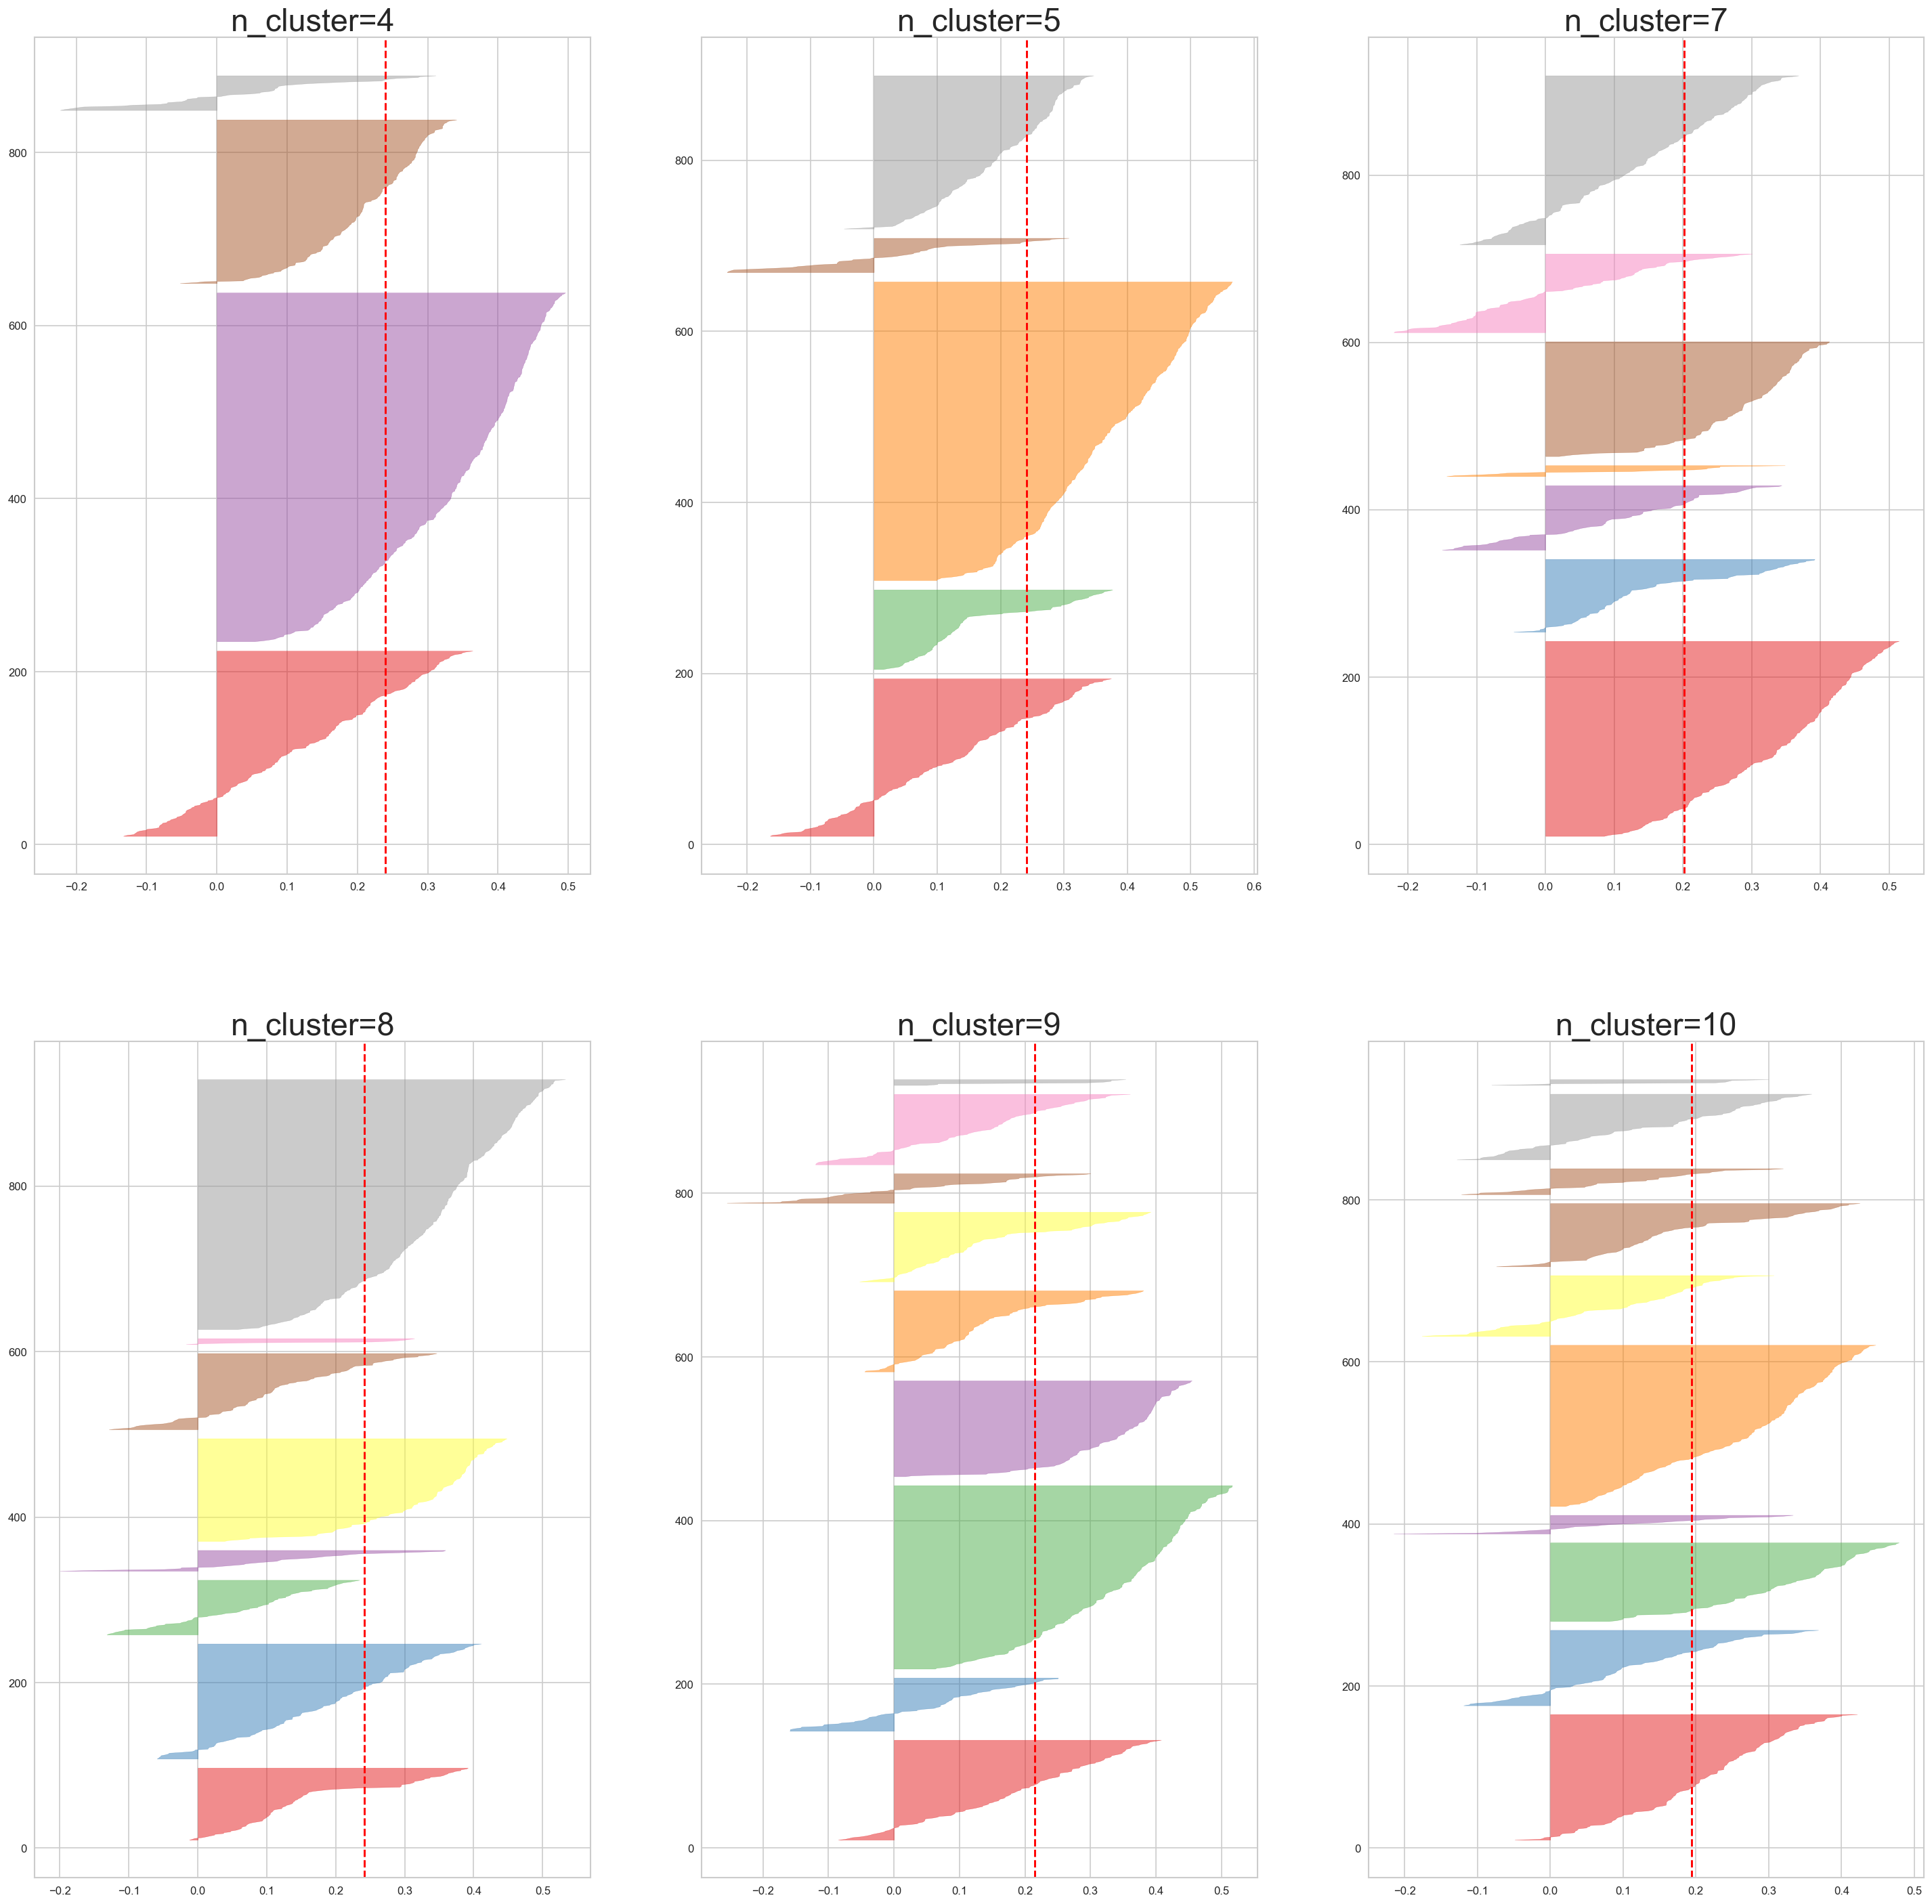

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 3, figsize=(30, 30), dpi=120)

model = KMeans(n_clusters=4, init="k-means++", n_init=12, max_iter=500, random_state=0)
visualizer = SilhouetteVisualizer(model, ax=ax[0][0])
visualizer.fit(X_scaled)
ax[0][0].set_title("n_cluster=4", fontsize=28)    


model = KMeans(n_clusters=5, init="k-means++", n_init=12, max_iter=500, random_state=0)
visualizer = SilhouetteVisualizer(model, ax=ax[0][1])
visualizer.fit(X_scaled)
ax[0][1].set_title("n_cluster=5", fontsize=28)    


model = KMeans(n_clusters=7, init="k-means++", n_init=12, max_iter=500, random_state=0)
visualizer = SilhouetteVisualizer(model, ax=ax[0][2])
visualizer.fit(X_scaled)
ax[0][2].set_title("n_cluster=7", fontsize=28)   

model = KMeans(n_clusters=8, init="k-means++", n_init=12, max_iter=500, random_state=0)
visualizer = SilhouetteVisualizer(model, ax=ax[1][0])
visualizer.fit(X_scaled)
ax[1][0].set_title("n_cluster=8", fontsize=28)  

model = KMeans(n_clusters=9, init="k-means++", n_init=12, max_iter=500, random_state=0)
visualizer = SilhouetteVisualizer(model, ax=ax[1][1])
visualizer.fit(X_scaled)
ax[1][1].set_title("n_cluster=9", fontsize=28)  

model = KMeans(n_clusters=10, init="k-means++", n_init=12, max_iter=500, random_state=0)
visualizer = SilhouetteVisualizer(model, ax=ax[1][2])
visualizer.fit(X_scaled)
ax[1][2].set_title("n_cluster=10", fontsize=28)       


plt.show()